<a href="https://colab.research.google.com/github/Yashwanth-Chandrakumar/Traffic-Neo/blob/main/Traffic_Bit_n_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Hunt-03/Traffic-signal-AI.git

Cloning into 'Traffic-signal-AI'...
remote: Enumerating objects: 512, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 512 (delta 18), reused 14 (delta 2), pack-reused 467 (from 1)
Receiving objects: 100% (512/512), 256.37 MiB | 30.16 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Updating files: 100% (549/549), done.
Filtering content: 100% (2/2), 110.38 MiB | 47.33 MiB/s, done.


In [ ]:
import os

# Change to your desired directory
os.chdir('/content/Traffic-signal-AI')

!pip install -r requirements.txt
!pwd

/content/Traffic-signal-AI


In [ ]:
!python main.py

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.1.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[ WARN:0@1.589] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1.591] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
Traceback (most recent call last):
  File "/content/Traffic-signal-AI/main.py", line 43, in <module>
    classify_and_print_label()
  File "/content/Traffic-signal-AI/main.py", line 23, in classify_and_print_label
    cv2.imshow("Traffic Signal", frame)
cv2.error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BP2gt180K2LDbxfUE8kg")
project = rf.workspace("hf-riaag").project("indian-vehicle-dataset")
version = project.version(26)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian-Vehicle-Dataset-26 in yolov9:: 100%|██████████| 326/326 [00:00<00:00, 1048.92it/s]


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.8/874.8 kB 21.5 MB/s eta 0:00:00


In [ ]:
import os
import torch
from ultralytics import YOLO
import gc

def train_model(model, data, epochs, imgsz, batch):
    try:
        results = model.train(
            data=data,
            epochs=epochs,
            imgsz=imgsz,
            batch=batch,
            device=0,  # Use the first GPU
            workers=8,  # Adjust based on your CPU cores
            patience=50,  # Early stopping patience
            save_period=10,  # Save checkpoint every 10 epochs
            cache=True,  # Cache images for faster training
            amp=True,  # Use mixed precision training
        )
        return results
    except Exception as e:
        print(f"An error occurred during training: {e}")
        return None

def main():
    # Check for GPU availability
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    if device == 'cuda':
        # Get the number of available GPUs
        num_gpus = torch.cuda.device_count()
        print(f"Number of available GPUs: {num_gpus}")

        # Print available GPU memory
        for i in range(num_gpus):
            print(f"GPU {i} memory: {torch.cuda.get_device_properties(i).total_memory / 1e9:.2f} GB")
    else:
        num_gpus = 1  # Default to 1 if no GPU

    # Clear GPU cache
    torch.cuda.empty_cache()
    gc.collect()

    # Load a pre-trained YOLOv9 model
    model = YOLO("/content/yolov9_traffic.pt")  # Change to your chosen version if needed

    # Define training parameters
    data = "/content/BAP-4/data.yaml"
    epochs = 10
    imgsz = 640
    batch = 8

    # Train the model
    results = train_model(model, data, epochs, imgsz, batch)

    if results:
        # Save the trained model
        model.save('yolov9_traffic.pt')
        print("Model saved successfully.")
    else:
        print("Training failed. Model not saved.")

if __name__ == '__main__':
    # Set environment variables for better memory management
    os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:512'

    main()

Using device: cuda
Number of available GPUs: 1
GPU 0 memory: 15.84 GB
Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov9_traffic.pt, data=/content/BAP-4/data.yaml, epochs=10, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=10, cache=True, device=0, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

train: Scanning /content/BAP-4/train/labels.cache... 1179 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1179/1179 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.7GB RAM): 100%|██████████| 1179/1179 [00:22<00:00, 52.76it/s] 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/BAP-4/valid/labels.cache... 333 images, 0 backgrounds, 0 corrupt: 100%|██████████| 333/333 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.2GB RAM): 100%|██████████| 333/333 [00:06<00:00, 48.38it/s] 


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train13
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      12.2G      1.503      1.164      1.373         16        640: 100%|██████████| 148/148 [02:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]

                   all        333       3004      0.598      0.334      0.374      0.202


In [ ]:
from google.colab import files
files.download('yolov9_traffic.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


0: 384x640 (no detections), 36.5ms
Speed: 2.3ms preprocess, 36.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


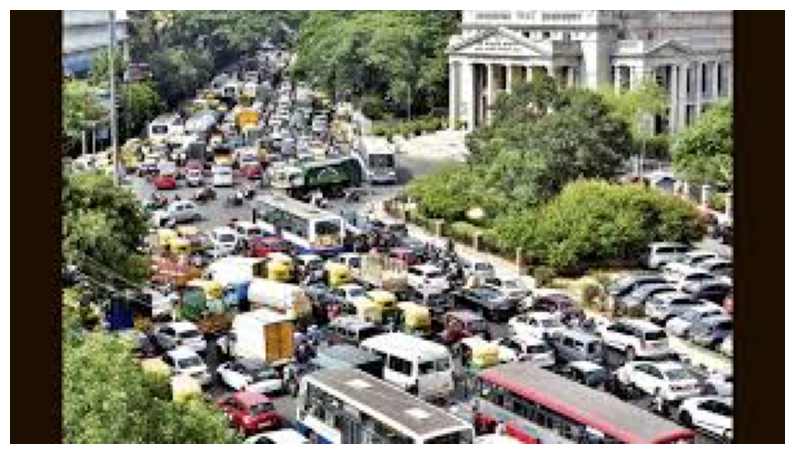

True

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your trained YOLO model
model = YOLO("yolov9_traffic.pt")  # Replace with your trained model's path

# Load the image you want to predict on
image_path = "/content/download.jpg"
image = cv2.imread(image_path)

# Perform inference on the image
results = model(image)

# Extract information from results
for result in results:
    # result.boxes.xyxy contains the bounding box coordinates
    # result.boxes.cls contains the class indices
    # result.boxes.conf contains the confidence scores

    # Loop through each detection in the result
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Bounding box coordinates
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class index
        class_name = model.names[cls]  # Get the class name
        label = f"{class_name} {conf:.2f}"  # Class name and confidence

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw the label
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Convert the image from BGR to RGB format for displaying in matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# Save the image with predictions (optional)
output_path = "predicted_image.jpg"
cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))


In [ ]:
from ultralytics import YOLO

# Build a YOLOv9c model from scratch
model = YOLO("yolov9c.yaml")

# Build a YOLOv9c model from pretrained weight
model = YOLO("yolov9c.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
# results = model.train(data="coco8.yaml", epochs=100, imgsz=640)

# Run inference with the YOLOv9c model on the 'bus.jpg' image
results = model("/content/an-ambulance-stuck-amid-heavy-traffic-congestion-caused-after-a-heavy-rain-spell-near-ito-on-august-17-2020-in-new-delhi-india-photo-by-mayank-makhijanurphoto-2KBX8R3.jpg")

YOLOv9c summary: 618 layers, 25,590,912 parameters, 0 gradients, 104.0 GFLOPs

image 1/1 /content/an-ambulance-stuck-amid-heavy-traffic-congestion-caused-after-a-heavy-rain-spell-near-ito-on-august-17-2020-in-new-delhi-india-photo-by-mayank-makhijanurphoto-2KBX8R3.jpg: 640x416 9 persons, 23 cars, 4 motorcycles, 1 bus, 3 trucks, 1 backpack, 2 handbags, 35.5ms
Speed: 3.5ms preprocess, 35.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BP2gt180K2LDbxfUE8kg")
project = rf.workspace("aabha").project("bap-obqut")
version = project.version(4)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BAP-4 in yolov9:: 100%|██████████| 3374/3374 [00:33<00:00, 99.74it/s] 


In [30]:
!git clone https://github.com/Natnael-k/AI-based-Traffic-Control-System--.git
import os
os.chdir('/content/AI-based-Traffic-Control-System--')
!pip install -r requirement.txt

Cloning into 'AI-based-Traffic-Control-System--'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 185 (delta 2), reused 10 (delta 2), pack-reused 171 (from 1)
Receiving objects: 100% (185/185), 93.57 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Updating files: 100% (18/18), done.
  Using cached tensorrt-10.4.0.tar.gz (16 kB)
  Preparing metadata (setup.py) ... done
  Using cached pycuda-2024.1.2.tar.gz (1.7 MB)
ERROR: Operation cancelled by user


In [ ]:
!python -m pip install --upgrade pip setuptools wheel


  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [33]:
os.chdir("/content/AI-based-Traffic-Control-System--/implementation_with_yolov5s_onnx_model")

In [48]:
!python main.py --sources "video1.mp4,video2.mp4,video3.mp4,video5.mp4" --output "output.mp4"

Streaming output truncated to the last 5000 lines.
Current working directory: /content/AI-based-Traffic-Control-System--/implementation_with_yolov5s_onnx_model
Looking for coco.names at: /content/AI-based-Traffic-Control-System--/datas/coco.names
Shape of dets after modify: (1, 6300, 85)
Forward pass time: 0.1882 seconds
Shape of layerOutputs: [(1, 3, 20, 20, 85), (1, 3, 10, 10, 85), (1, 3, 40, 40, 85)]
Current working directory: /content/AI-based-Traffic-Control-System--/implementation_with_yolov5s_onnx_model
Looking for coco.names at: /content/AI-based-Traffic-Control-System--/datas/coco.names
Shape of dets after modify: (1, 6300, 85)
Forward pass time: 0.1845 seconds
Shape of layerOutputs: [(1, 3, 20, 20, 85), (1, 3, 10, 10, 85), (1, 3, 40, 40, 85)]
Current working directory: /content/AI-based-Traffic-Control-System--/implementation_with_yolov5s_onnx_model
Looking for coco.names at: /content/AI-based-Traffic-Control-System--/datas/coco.names
Shape of dets after modify: (1, 6300, 85)

In [ ]:
!tree


/bin/bash: line 1: tree: command not found


In [32]:
!pwd

/content/AI-based-Traffic-Control-System--
